In [153]:
import os
import sys
import glob
import shutil
import datetime
import platform
from functools import reduce

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from astropy import units as u
from astropy.time import Time

from scipy import signal

In [154]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

sys.path.append(PACK_DIR)
from PRAO import *

In [155]:
def flatter(data, polynomialOrder=15):

    ## Применяем медианную фильтрацию с максимальным шагом:
    res_filter = data # signal.medfilt(data, kernel_size=29)
    # Фитируем получившийся массив:
    xData = range(len(res_filter))
    yData = res_filter
    # curve fit the data
    fittedParameters = np.polyfit(xData, yData, polynomialOrder)
    xModel = np.linspace(min(xData), max(xData), len(xData))
    yModel = np.polyval(fittedParameters, xModel)

    return yModel

In [156]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2019_calib_dina_final.csv', sep='\t')

In [157]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1,51612,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0,0.610006
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,11420,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.781842
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,54882,32.522950,1.40060,4.54450,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.362872
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,18010,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.718194
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,36044,24.357480,3.72500,16.03985,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.369593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,56843,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.832012
16833,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,16607,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.853073
16834,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,37266,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.848343
16835,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,26403,11.980550,4.73075,24.24975,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.848379


In [158]:
#SKIP ZEROS_END
gp_table = gp_table.where(gp_table.zeros_ends == 0).dropna().reset_index(drop=True)

In [159]:
#SKIP PEARS < 0.6
gp_table = gp_table.where(gp_table.pears >= 0.6).dropna().reset_index(drop=True)

In [160]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1.0,51612.0,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0.0,0.610006
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,11420.0,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.781842
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,18010.0,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.718194
3,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,21354.0,78.662550,11.70395,49.80325,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.935142
4,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,37243.0,35.034450,2.57025,25.17355,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.696018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,56843.0,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.832012
6179,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,16607.0,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.853073
6180,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,37266.0,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.848343
6181,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,26403.0,11.980550,4.73075,24.24975,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.848379


In [161]:
# Create table session of observation
def read_header_obs(filename):
    header = {}
    with open(filename, 'r') as f:
        for i in range(6):
            key, value = f.readline().split()
            header[key] = value
    return header

files_0531 = sorted(
    glob.glob('./final_dataset/obs_data/*'), 
    key=lambda x: datetime.datetime.strptime(os.path.basename(x), '%d.%m.%Y_obs_0531+21.csv'))
print(len(files_0531))
crab_sessoins = pd.DataFrame(columns=['Date', 'Time_start', 'Session'])

idx = 0
for filename in files_0531:
    header = read_header_obs(filename)
    day, month, year = header['date'].split('.')
    date = year + '-' + month + '-' + day
    
    crab_sessoins.loc[idx] = [date, header['time'], 1]
    idx += 1

crab_sessoins['Time_series'] = pd.to_datetime(crab_sessoins['Date'], format='%Y-%m-%d', errors='ignore')
crab_sessoins = crab_sessoins.set_index('Time_series')

2110


In [162]:
crab_sessoins

,Date,Time_start,Session
Time_series,,,
2010-02-13,2010-02-13,20:26:28.9413394,1
2010-09-03,2010-09-03,07:12:17.2248210,1
2010-09-04,2010-09-04,07:08:21.3085403,1
2010-09-05,2010-09-05,07:04:25.4187240,1
2010-09-06,2010-09-06,07:00:29.5241603,1
...,...,...,...
2019-09-10,2019-09-10,06:46:00.8620910,1
2019-09-16,2019-09-16,06:22:25.4621543,1
2019-09-17,2019-09-17,06:18:29.5828304,1


In [163]:
# create table with pulses more than 1800 Jy
gp_table_80 = gp_table.where(gp_table['amp of gp, Jy'] > 80).dropna().reset_index(drop=True)

In [164]:
gp_table_80

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430.0,34.0,1719.858245,8.060292,./final_dataset/\obs_data\09.09.2010_obs_0531+...,1.0,45640.0,121.161705,19.33275,54.60850,./final_dataset/gp_plot/09.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/09.09.2010_plot_05...,0.0,0.956898
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430.0,34.0,1719.899890,7.515294,./final_dataset/\obs_data\12.09.2010_obs_0531+...,1.0,36629.0,111.648630,19.42215,63.82415,./final_dataset/gp_plot/12.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/12.09.2010_plot_05...,0.0,0.939208
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430.0,34.0,1719.914380,7.683190,./final_dataset/\obs_data\17.09.2010_obs_0531+...,1.0,41855.0,105.871420,18.77400,39.25405,./final_dataset/gp_plot/17.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/17.09.2010_plot_05...,0.0,0.944065
3,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430.0,34.0,1719.841330,11.058682,./final_dataset/\obs_data\17.10.2010_obs_0531+...,1.0,27361.0,232.496190,21.39640,59.65960,./final_dataset/gp_plot/17.10.2010_plot_0531+2...,./final_dataset/gp_plot_txt/17.10.2010_plot_05...,0.0,0.970582
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430.0,34.0,1719.841330,11.058682,./final_dataset/\obs_data\17.10.2010_obs_0531+...,1.0,3239.0,139.469070,12.62030,41.72000,./final_dataset/gp_plot/17.10.2010_plot_0531+2...,./final_dataset/gp_plot_txt/17.10.2010_plot_05...,0.0,0.955412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442.0,34.0,1719.542180,14.425982,./final_dataset/\obs_data\21.03.2018_obs_0531+...,1.0,6636.0,86.905020,1.98915,13.79740,./final_dataset/gp_plot/21.03.2018_plot_0531+2...,./final_dataset/gp_plot_txt/21.03.2018_plot_05...,0.0,0.688279
1318,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442.0,34.0,1719.542180,14.425982,./final_dataset/\obs_data\21.03.2018_obs_0531+...,1.0,14130.0,80.705080,7.01790,14.60945,./final_dataset/gp_plot/21.03.2018_plot_0531+2...,./final_dataset/gp_plot_txt/21.03.2018_plot_05...,0.0,0.754767
1319,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442.0,34.0,1719.542180,14.425982,./final_dataset/\obs_data\21.03.2018_obs_0531+...,1.0,56806.0,80.514840,6.22820,9.78930,./final_dataset/gp_plot/21.03.2018_plot_0531+2...,./final_dataset/gp_plot_txt/21.03.2018_plot_05...,0.0,0.716458
1320,07.05.2018,15:00:23.4933052,2.4576,6.007598,2442.0,34.0,1719.934880,2.917288,./final_dataset/\obs_data\07.05.2018_obs_0531+...,1.0,76676.0,152.581990,20.72590,51.44225,./final_dataset/gp_plot/07.05.2018_plot_0531+2...,./final_dataset/gp_plot_txt/07.05.2018_plot_05...,0.0,0.959079


In [165]:
gp_table_80['Time_series'] = pd.to_datetime(gp_table_80['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_80 = gp_table_80.set_index('Time_series')

In [166]:
gp_crab_m_80 = gp_table_80['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_80.join(gp_crab_m_ses, how='outer')

In [167]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

[]

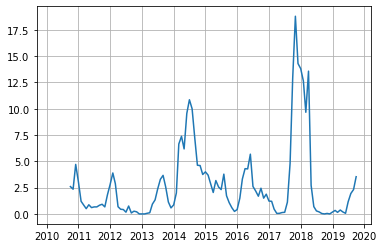

In [217]:
plt.close()
plt.plot(result_crab['pase_GP'])
plt.grid()
plt.plot()
#plt.savefig('res_crab_2010_2018.png', format='png', dpi=150)

In [169]:
# статистика по всем импульсам
gp_table['Time_series'] = pd.to_datetime(gp_table['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_full = gp_table.set_index('Time_series')

In [170]:
gp_crab_m_full = gp_table_full['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_full.join(gp_crab_m_ses, how='outer')

In [171]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

[]

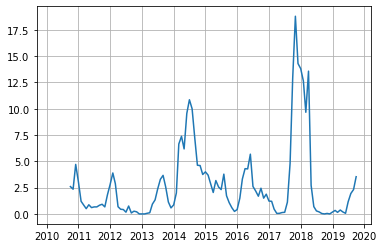

In [172]:
plt.close()
plt.plot(result_crab['pase_GP'])
plt.grid()
plt.plot()

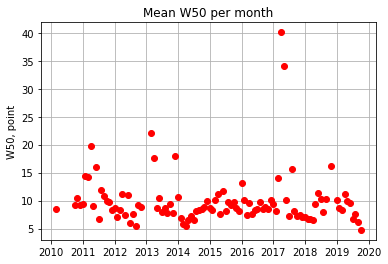

In [173]:
plt.close()
plt.title('Mean W50 per month')
plt.plot(gp_table_full['W50, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W50, point')
plt.grid()
plt.show()

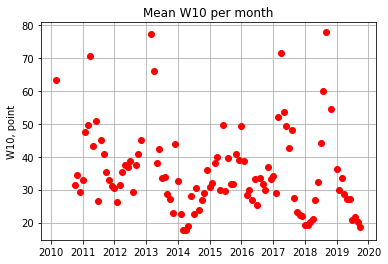

In [174]:
plt.close()
plt.title('Mean W10 per month')
plt.plot(gp_table_full['W10, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W10, point')
plt.grid()
plt.show()

## Перерасчет W10 и W50 нормированных импульсов.

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


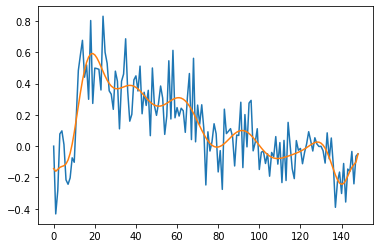

In [175]:
profile = np.genfromtxt(gp_table_full['fName'][0], skip_header=7)
normal_pulse = profile/max(profile)
cor_noise = normal_pulse[:5]
media = np.median(cor_noise)
normal_pulse -= media
plt.close()
plt.plot(normal_pulse)
plt.plot(flatter(normal_pulse, polynomialOrder=19))
plt.show()

In [176]:
gp_table_full['New W10, point'] = None
gp_table_full['New W50, point'] = None

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    normal_pulse = profile/max(profile)
    cor_noise = normal_pulse[:5]
    media = np.median(cor_noise)
    normal_pulse -= media
    normal_pulse = flatter(normal_pulse, polynomialOrder=19)
    
    w10, _, _ =  width_of_pulse(normal_pulse, 0.1)
    w50, _, _ = width_of_pulse(normal_pulse, 0.5)
    
    gp_table_full['New W10, point'][idx] = w10
    gp_table_full['New W50, point'][idx] = w50

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_lau

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This

In [177]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point"
Time_series,,,,,,,,,,,,,,,,,,,,
2010-02-13,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1.0,51612.0,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0.0,0.610006,64.121,33.3888
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,11420.0,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.781842,80.6378,34.3582
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,18010.0,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.718194,68.7756,32.4268
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,21354.0,78.662550,11.70395,49.80325,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.935142,132.504,22.0594
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,37243.0,35.034450,2.57025,25.17355,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.696018,45.7912,25.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,56843.0,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.832012,23.458,14.1266
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,16607.0,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.853073,23.458,14.1932
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,37266.0,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.848343,23.5394,13.949


In [179]:
gp_table_full['New W50, point'] = pd.to_numeric(gp_table_full['New W50, point'])
gp_table_full['New W10, point'] = pd.to_numeric(gp_table_full['New W10, point'])

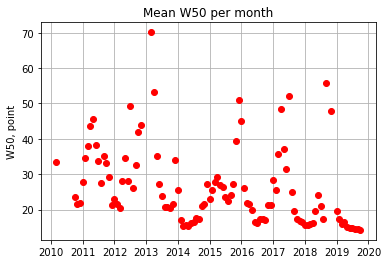

In [180]:
plt.close()
plt.title('Mean W50 per month')
plt.plot(gp_table_full['New W50, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W50, point')
plt.grid()
plt.show()

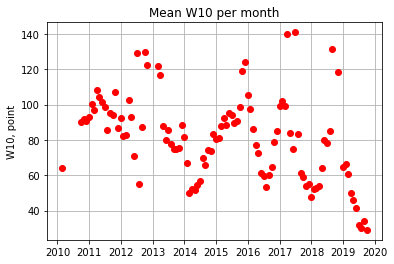

In [181]:
plt.close()
plt.title('Mean W10 per month')
plt.plot(gp_table_full['New W10, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W10, point')
plt.grid()
plt.show()

## Анализ W50 и W10 особо выделяющихся импульсов в итоговой(полной таблице)

In [198]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['New W10, point'] > 147).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point"
0,30.12.2011,23:25:25.8979949,2.4576,5.992402,2430.0,34.0,1719.900515,10.080430,./final_dataset/\obs_data\30.12.2011_obs_0531+...,1.0,68190.0,51.265295,2.48830,17.38085,./final_dataset/gp_plot/30.12.2011_plot_0531+2...,./final_dataset/gp_plot_txt/30.12.2011_plot_05...,0.0,0.602379,147.1638,39.8416
1,17.05.2014,14:20:57.4927177,2.4576,5.998144,2438.0,34.0,1719.138445,19.237101,./final_dataset/\obs_data\17.05.2014_obs_0531+...,1.0,51046.0,45.504415,3.76225,16.65075,./final_dataset/gp_plot/17.05.2014_plot_0531+2...,./final_dataset/gp_plot_txt/17.05.2014_plot_05...,0.0,0.684616,147.4080,16.1764
2,28.01.2015,21:30:31.2519016,2.4576,5.999937,2439.0,34.0,1719.840280,12.237377,./final_dataset/\obs_data\28.01.2015_obs_0531+...,1.0,12271.0,69.236050,11.39105,41.42200,./final_dataset/gp_plot/28.01.2015_plot_0531+2...,./final_dataset/gp_plot_txt/28.01.2015_plot_05...,0.0,0.816800,147.1638,42.2392
3,23.09.2017,05:52:52.7157287,2.4576,6.005180,2442.0,34.0,1719.899855,3.942924,./final_dataset/\obs_data\23.09.2017_obs_0531+...,1.0,34128.0,15.520315,5.16285,7.93425,./final_dataset/gp_plot/23.09.2017_plot_0531+2...,./final_dataset/gp_plot_txt/23.09.2017_plot_05...,0.0,0.668359,148.0000,35.5200
4,07.11.2017,02:55:57.2139472,2.4576,6.005684,2442.0,34.0,1719.888295,6.359022,./final_dataset/\obs_data\07.11.2017_obs_0531+...,1.0,46858.0,25.744005,3.98575,13.13435,./final_dataset/gp_plot/07.11.2017_plot_0531+2...,./final_dataset/gp_plot_txt/07.11.2017_plot_05...,0.0,0.658916,147.7114,24.7974


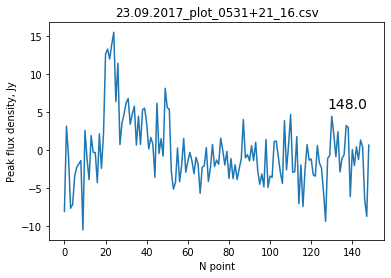

In [203]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.text(max(x) - 20, max(profile) - 10, round(gp_table_W_anomaly['New W10, point'][i], 2), fontsize=14)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ супер ярких импульсов в итоговой(полной таблице)

In [127]:
gp_table_real_gp = gp_table_full.where(gp_table_full['amp of gp, Jy'] > 800).dropna().reset_index(drop=True)
gp_table_real_gp

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point"
0,20.02.2014,19:59:04.8349270,2.4576,5.997863,2438.0,34.0,1719.978555,16.152918,./final_dataset/\obs_data\20.02.2014_obs_0531+...,1.0,65585.0,811.932915,7.82995,25.55350,./final_dataset/gp_plot/20.02.2014_plot_0531+2...,./final_dataset/gp_plot_txt/20.02.2014_plot_05...,0.0,0.905275,25.5374,7.8292
1,11.03.2014,18:44:22.7352867,2.4576,5.998029,2438.0,34.0,1719.728555,14.119079,./final_dataset/\obs_data\11.03.2014_obs_0531+...,1.0,58476.0,918.749795,5.09580,27.69165,./final_dataset/gp_plot/11.03.2014_plot_0531+2...,./final_dataset/gp_plot_txt/11.03.2014_plot_05...,0.0,0.889403,27.7426,5.0986
2,20.03.2014,18:08:59.6623497,2.4576,5.998085,2438.0,34.0,1719.734210,14.242300,./final_dataset/\obs_data\20.03.2014_obs_0531+...,1.0,18973.0,924.429180,6.36230,24.30935,./final_dataset/gp_plot/20.03.2014_plot_0531+2...,./final_dataset/gp_plot_txt/20.03.2014_plot_05...,0.0,0.894737,24.4570,6.4158
3,17.05.2014,14:20:57.4927177,2.4576,5.998144,2438.0,34.0,1719.138445,19.237101,./final_dataset/\obs_data\17.05.2014_obs_0531+...,1.0,31027.0,1713.398305,10.07240,32.16165,./final_dataset/gp_plot/17.05.2014_plot_0531+2...,./final_dataset/gp_plot_txt/17.05.2014_plot_05...,0.0,0.929535,34.4322,10.1158
4,05.07.2015,11:09:19.1243076,2.4576,6.000349,2439.0,34.0,1719.606940,17.545779,./final_dataset/\obs_data\05.07.2015_obs_0531+...,1.0,29469.0,819.768770,16.94875,94.07860,./final_dataset/gp_plot/05.07.2015_plot_0531+2...,./final_dataset/gp_plot_txt/05.07.2015_plot_05...,0.0,0.967108,106.5600,17.3308
5,07.06.2016,12:56:28.9220027,2.4576,6.002801,2439.0,34.0,1721.024700,21.156608,./final_dataset/\obs_data\07.06.2016_obs_0531+...,1.0,50354.0,876.583160,11.39105,44.08910,./final_dataset/gp_plot/07.06.2016_plot_0531+2...,./final_dataset/gp_plot_txt/07.06.2016_plot_05...,0.0,0.957739,51.5114,11.9436
6,17.01.2018,22:12:52.4613685,2.4576,6.006854,2442.0,34.0,1719.770655,22.056445,./final_dataset/\obs_data\17.01.2018_obs_0531+...,1.0,41031.0,1182.231155,7.78525,29.89685,./final_dataset/gp_plot/17.01.2018_plot_0531+2...,./final_dataset/gp_plot_txt/17.01.2018_plot_05...,0.0,0.904859,30.5176,8.0512


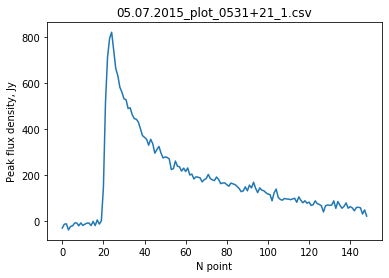

In [108]:
i = 4
file = gp_table_real_gp['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ корреляции амплитуд шума в начале и конце записи, а также амплитуды импульса.

In [205]:
ampl = []
start_no = []
end_no = []

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    start_noise = profile[:10]
    end_noise = profile[-20:]

    ampl.append(gp_table_full['amp of gp, Jy'][idx])
    start_no.append(np.std(start_noise))
    end_no.append(np.std(end_noise))

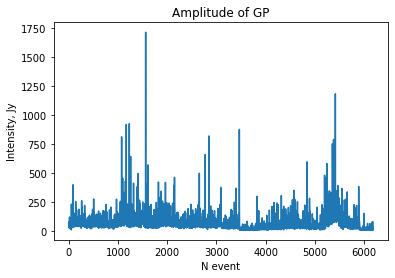

In [210]:
plt.close()
plt.title('Amplitude of GP')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(ampl)
plt.show()

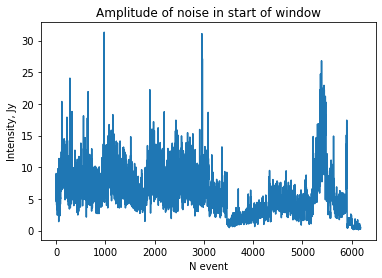

In [212]:
plt.close()
plt.title('Amplitude of noise in start of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(start_no)
plt.show()

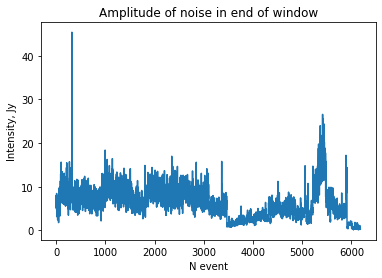

In [213]:
plt.close()
plt.title('Amplitude of noise in end of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(end_no)
plt.show()

In [214]:
df = pd.DataFrame(list(zip(ampl, start_no, end_no)), 
               columns =['amp', 'start', 'noise'])

In [216]:
df.corr()

,amp,start,noise
amp,1.000000,0.389297,0.437333
start,0.389297,1.000000,0.798235
noise,0.437333,0.798235,1.000000


## Добавление необходимых колонок

In [83]:
# Добавление колонки MJD в таблицу ГИ
gp_table_full['MJD'] = None
for index, row in gp_table_full.iterrows():
    day, month, year = row['Date'].split('.')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time start'], precision=7)
            - 4*u.hour
            + row['point of gp, point']*float(row['Tay, ms'])*u.millisecond)
    gp_table_full['MJD'].loc[index] = str(time_utc.mjd)

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,MJD
Time_series,,,,,,,,,,,,,,,,,,,
2010-02-13,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1.0,51612.0,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0.0,0.610006,55240.686525266094
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,11420.0,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.781842,55443.13131446663
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,18010.0,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.718194,55443.13131446663
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,21354.0,78.662550,11.70395,49.80325,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.935142,55444.12858767375
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,37243.0,35.034450,2.57025,25.17355,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.696018,55444.12858767375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,56843.0,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.832012,58745.09103969513
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,16607.0,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.853073,58745.09103969513
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,37266.0,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.848343,58745.09103969513


In [66]:
# Добавление колонки MJD в таблицу сеансов
crab_sessoins['MJD'] = None
for index, row in crab_sessoins.iterrows():
    year, month, day  = row['Date'].split('-')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time_start'], precision=7)
            - 4*u.hour)
    crab_sessoins['MJD'].loc[index] = str(time_utc.mjd)

In [67]:
crab_sessoins

,Date,Time_start,Session,MJD
Time_series,,,,
2010-02-13,2010-02-13,20:26:28.9413394,1,55240.685057191426
2010-09-03,2010-09-03,07:12:17.2248210,1,55442.13353269469
2010-09-04,2010-09-04,07:08:21.3085403,1,55443.13080218218
2010-09-05,2010-09-05,07:04:25.4187240,1,55444.128071975974
2010-09-06,2010-09-06,07:00:29.5241603,1,55445.12534171482
...,...,...,...,...
2019-09-10,2019-09-10,06:46:00.8620910,1,58736.11528775568
2019-09-16,2019-09-16,06:22:25.4621543,1,58742.098905811974
2019-09-17,2019-09-17,06:18:29.5828304,1,58743.0961757272


In [70]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"E, Jy*ms"
Time_series,,,,,,,,,,,,,,,,,,,
2010-02-13,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1.0,51612.0,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0.0,0.610006,36500.669054
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,11420.0,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.781842,73356.128234
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1.0,18010.0,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0.0,0.718194,35092.405294
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,21354.0,78.662550,11.70395,49.80325,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.935142,51731.646994
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.846590,7.883726,./final_dataset/\obs_data\05.09.2010_obs_0531+...,1.0,37243.0,35.034450,2.57025,25.17355,./final_dataset/gp_plot/05.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/05.09.2010_plot_05...,0.0,0.696018,11084.963004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,56843.0,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.832012,20543.292199
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,16607.0,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.853073,22910.718067
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1.0,37266.0,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0.0,0.848343,21232.619696


In [85]:
# Добавление колонки энергии в таблицу ГИ
gp_table_full['E, Jy*ms']  = (
    (gp_table_full['amp of gp, Jy'] + gp_table_full['Median, Jy'])
    *  gp_table_full['W50, point']
    * gp_table_full['Tay, ms'])

In [86]:
gp_pulses_to_save = gp_table_full[['Date',
                                   'Time start',
                                   'MJD',
                                   'Median, Jy',
                                   'amp of gp, Jy',
                                   'W50, point',
                                   'W10, point',
                                   'E, Jy*ms',
                                   'Tay, ms',
                                   'STD, Jy',]]

In [88]:
crab_sessoins_to_save = crab_sessoins[[
    'Date',
    'Time_start',
    'MJD',
    'Session'
]]

In [90]:
gp_pulses_to_save.to_csv('crab_gp_kaz_pulses_final.csv',  sep='\t', header=True, index=False)
crab_sessoins_to_save.to_csv('crab_session_kaz_final.csv',  sep='\t', header=True, index=False)